In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import plotly.graph_objects as go
import os
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('attributes.csv')

In [3]:
df

,X,Y,Elev,V0,fact_ampl_pp_gr,fact_ampl_pp_mk,fact_ampl_pp_si,fact_ampl_pv_gr,fact_ampl_pv_mk,fact_ampl_pv_si,fact_freq_pp_gr,fact_freq_pp_mk,fact_freq_pp_si,fact_freq_pv_gr,fact_freq_pv_mk,fact_freq_pv_si
0,16150.04,17986.10,120.196317,1.384615,284.222090,1.263407,128.907331,273.690278,0.831353,204.348703,8.548696,6.568408,11.996490,10.265258,6.544156,14.080112
1,16100.66,17978.20,107.691602,1.384615,121.116506,0.474654,5.883812,226.122562,0.888885,216.866621,6.720315,1.564980,15.489440,11.086243,5.267542,14.642377
2,16051.08,17970.41,107.542895,1.384615,129.088820,0.439749,16.006177,251.086520,0.857030,218.860654,6.991201,1.617356,15.545039,12.472042,4.513891,14.664633
3,16001.70,17962.51,107.394356,1.285714,138.807711,0.391217,25.677526,260.215629,0.755396,205.086313,7.164131,1.653167,15.596579,13.653929,4.532095,14.609539
4,15952.72,17954.81,107.262991,1.285714,149.339632,0.327025,33.080279,250.405839,0.789063,203.922969,7.172312,1.667173,15.658531,11.179142,4.813766,14.357159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17041,16940.62,5966.41,126.919114,0.696429,263.354696,0.294337,9.028008,51.572902,1.429354,109.946778,1.566024,1.775867,9.069239,12.614860,10.079869,15.106354
17042,16891.54,5958.71,126.886749,0.629032,272.402869,0.275335,1.570021,15.672051,1.449612,111.585244,1.509666,1.981423,9.379994,12.260071,10.116983,15.802101
17043,16595.46,5911.83,127.149730,0.527027,248.416750,0.221825,62.808419,33.361552,1.777707,108.092136,3.471502,3.472866,6.565022,10.142469,10.494725,15.658013
17044,18214.91,4953.52,126.404079,1.218750,205.526961,0.042533,20.983285,253.511410,0.269825,212.383686,5.371321,2.155317,6.088115,9.588601,8.847043,15.906009


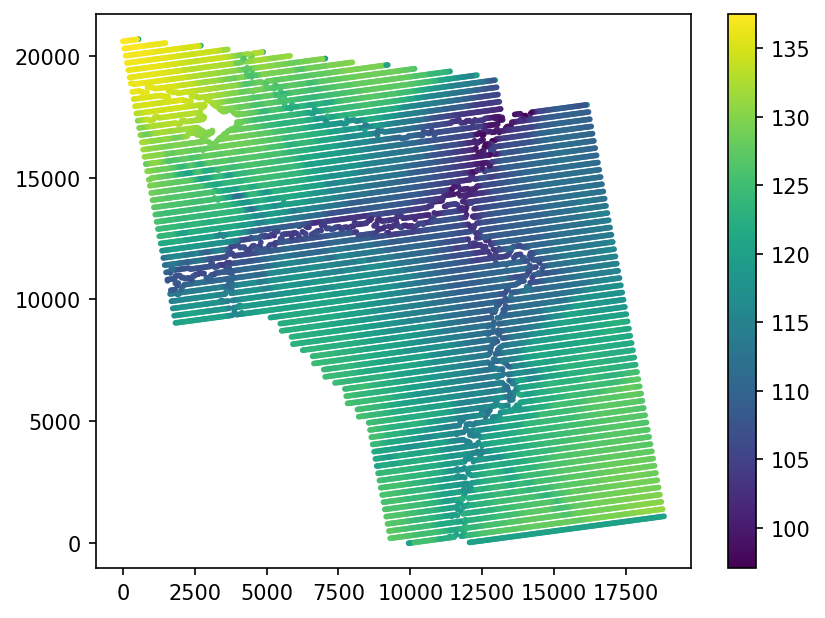

In [4]:
fig = plt.figure(dpi=150)
plt.scatter(df.X, df.Y, c=df.Elev, s=3)
plt.colorbar()

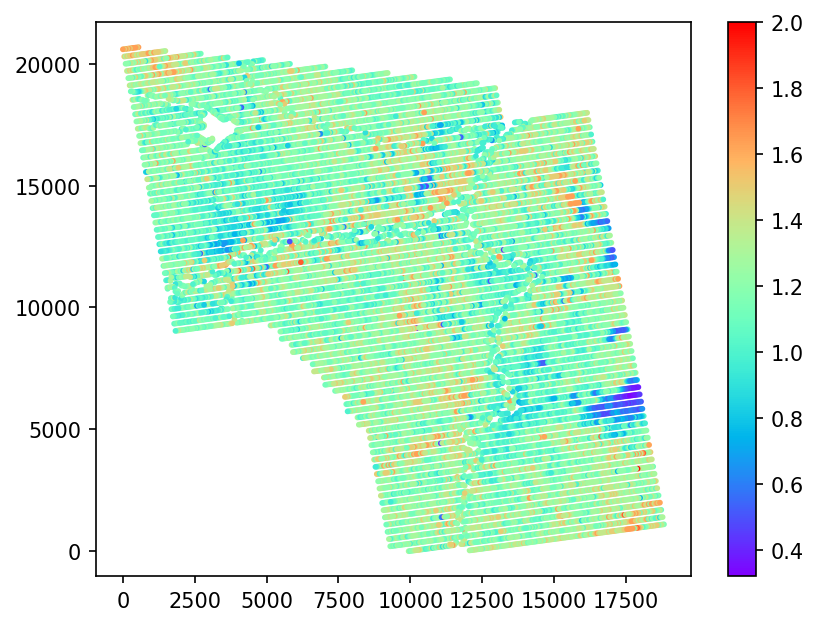

In [5]:
fig = plt.figure(dpi=150)
plt.scatter(df.X, df.Y, c=df.V0, s=3, cmap='rainbow')
plt.colorbar()

In [6]:
df.describe()

,X,Y,Elev,V0,fact_ampl_pp_gr,fact_ampl_pp_mk,fact_ampl_pp_si,fact_ampl_pv_gr,fact_ampl_pv_mk,fact_ampl_pv_si,fact_freq_pp_gr,fact_freq_pp_mk,fact_freq_pp_si,fact_freq_pv_gr,fact_freq_pv_mk,fact_freq_pv_si
count,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000
mean,10079.257772,11000.065603,118.577818,1.187334,297.553583,1.486119,134.277814,301.403800,1.907962,165.562174,8.124070,6.433913,11.732677,8.914612,8.260683,15.114040
std,4645.803299,5395.438863,8.025273,0.184249,148.394561,1.931546,69.244866,128.800872,1.734023,54.793411,3.008022,3.409650,2.720202,2.605531,3.261328,1.868319
min,0.000000,0.000000,97.034797,0.319672,0.159521,0.000131,0.002626,0.153293,0.000202,4.626388,0.003252,0.000446,2.217792,0.571090,0.002566,7.915195
25%,6519.890000,6782.155000,111.857142,1.058824,198.041070,0.403249,87.899770,211.201723,0.632853,127.766833,6.024848,4.141245,9.821538,7.111373,6.147358,13.824846
50%,10499.700000,11460.310000,119.497865,1.200000,275.646184,0.918984,127.502542,286.783214,1.448790,162.162419,8.107320,5.958225,11.816395,8.812072,8.972977,15.107784
75%,13887.615000,15505.140000,124.732741,1.285714,372.212388,1.839117,170.213639,374.685796,2.690147,202.422805,10.167639,8.181629,13.651900,10.659438,10.374452,16.328046
max,18824.370000,20675.620000,137.485739,2.000000,1064.210905,25.413900,510.457924,940.916155,13.668805,408.372080,19.776345,27.414433,22.434330,18.867420,26.536189,22.011933


# Убираем выбросы

In [7]:
attributes = df.drop(columns=["X", "Y"]).columns.values

def show_all(data, nrows=3, ncols=5, attributes=attributes ):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 17), sharey=False)
    for i in range(nrows):
      for j in range (ncols):
        if (i*ncols+j<len(attributes)):
          sns.stripplot(y = attributes[i*ncols+j], data = data, ax = axes[i,j], color = '#26fe3c')

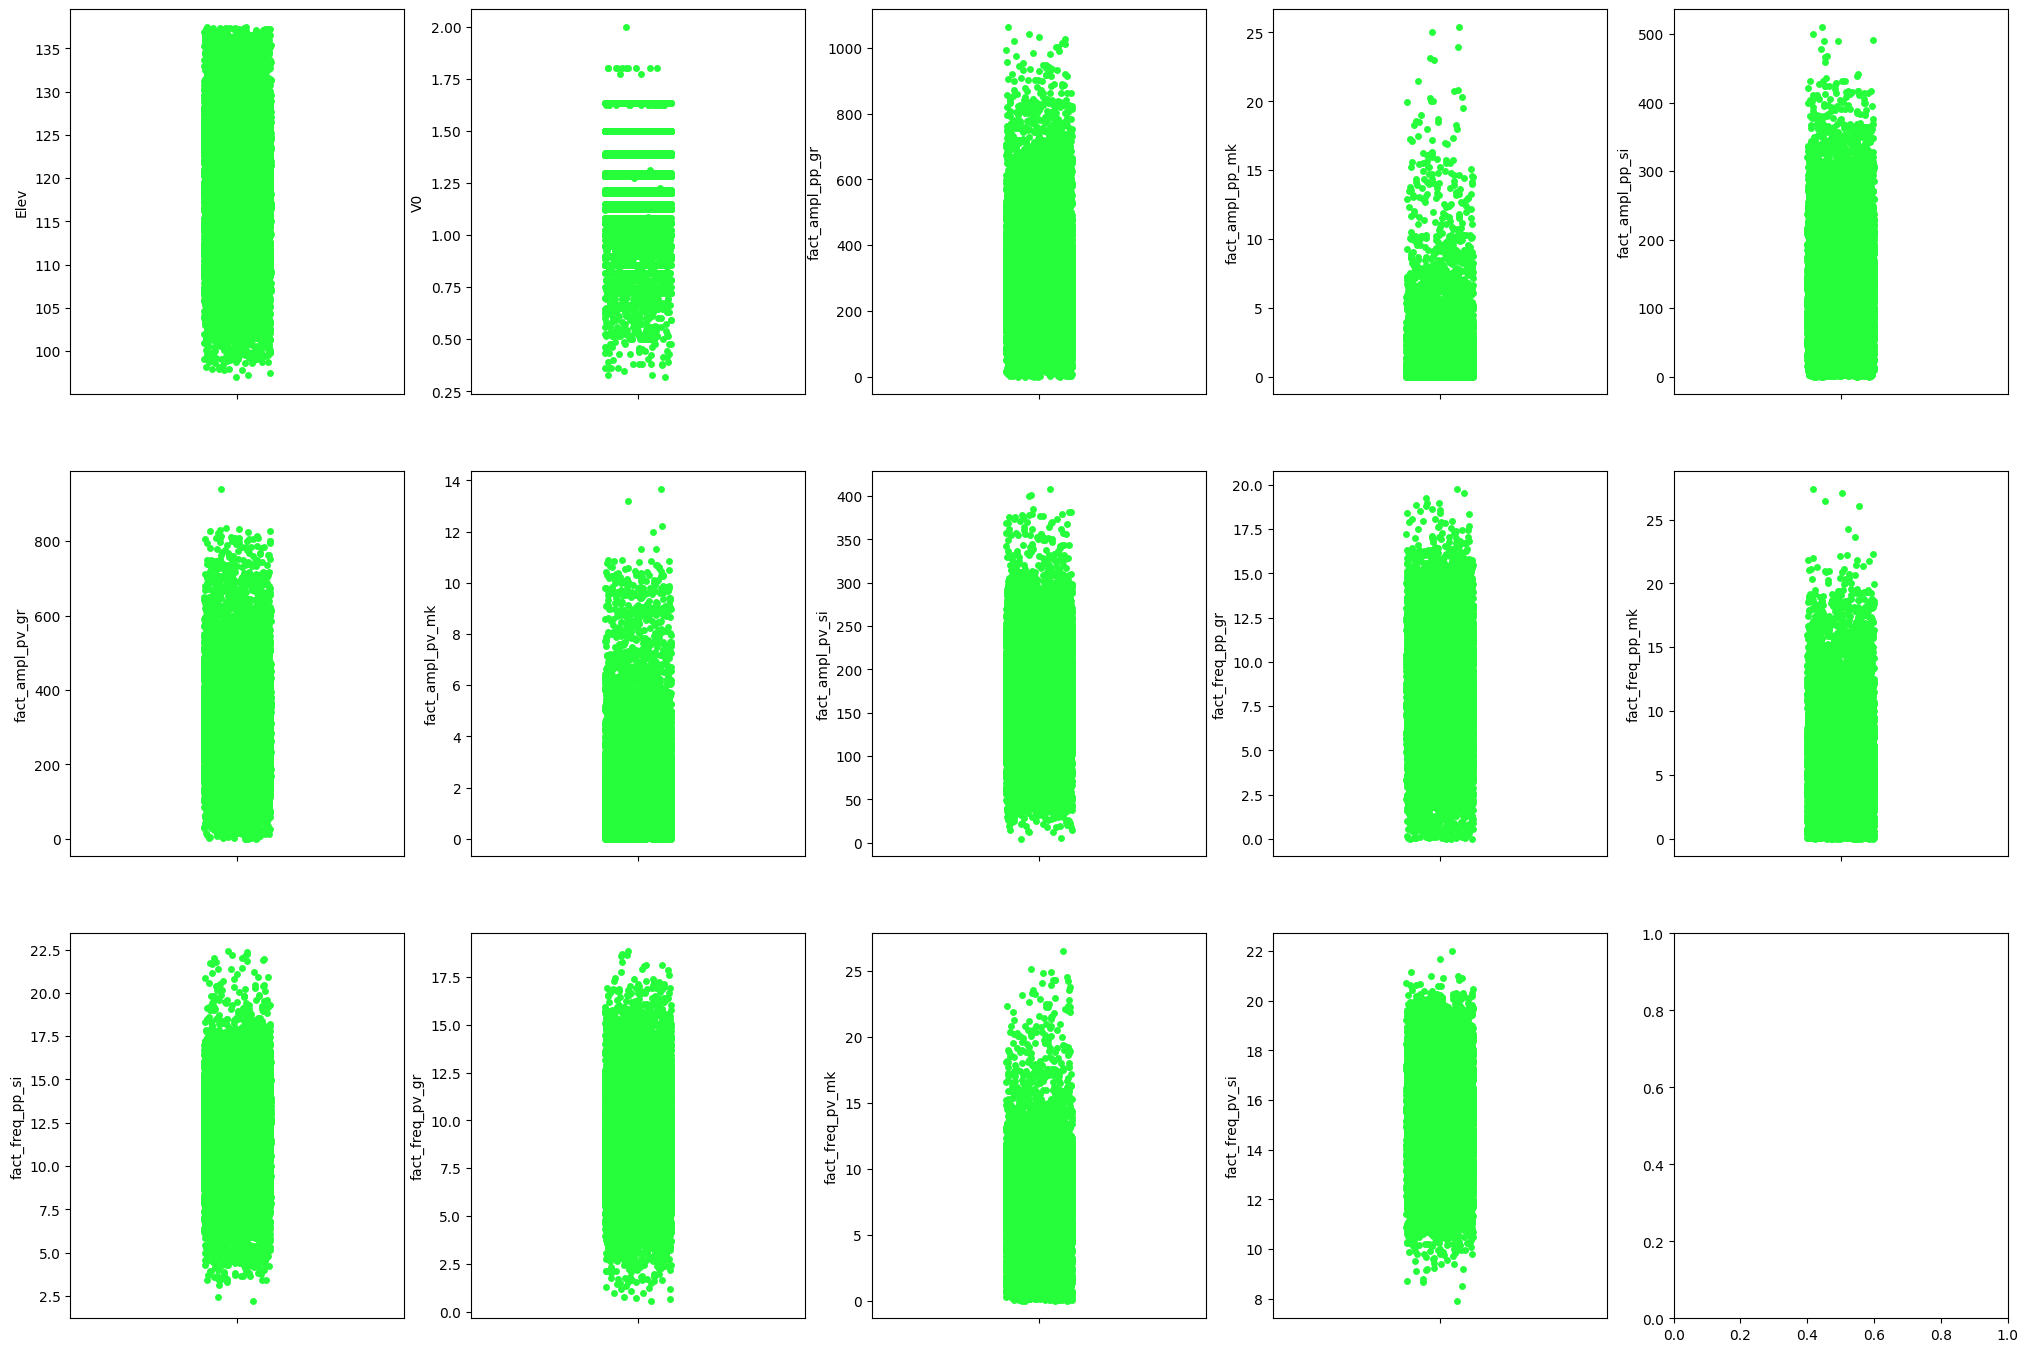

In [8]:
show_all(df)

In [9]:
def filtered(df, attributes, n=3):
    for attribute in attributes:
        mean = df[attribute].mean()
        sigma = df[attribute].std()
        df = df[(df[attribute] <= mean+(n*sigma)) & (df[attribute] >= mean-(n*sigma))]
    return df

df_filtered = filtered(df, attributes, 3)

In [10]:
df_filtered.describe()

,X,Y,Elev,V0,fact_ampl_pp_gr,fact_ampl_pp_mk,fact_ampl_pp_si,fact_ampl_pv_gr,fact_ampl_pv_mk,fact_ampl_pv_si,fact_freq_pp_gr,fact_freq_pp_mk,fact_freq_pp_si,fact_freq_pv_gr,fact_freq_pv_mk,fact_freq_pv_si
count,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000
mean,10046.699464,11155.883929,118.598706,1.195050,284.043963,1.228903,128.164769,297.298811,1.769754,164.143010,8.165724,6.240980,11.758588,8.925346,8.180460,15.145174
std,4568.031945,5368.090580,7.886988,0.172148,131.432108,1.197102,60.283290,119.943325,1.428060,52.977417,2.904866,3.044615,2.632653,2.552511,3.069636,1.848600
min,0.000000,0.000000,97.204963,0.642857,0.159521,0.000131,0.002626,0.681348,0.000202,4.626388,0.003252,0.000446,3.749578,1.178359,0.002566,9.583894
25%,6610.350000,7138.940000,111.932167,1.058824,193.784792,0.382034,86.510045,212.043528,0.623030,127.458266,6.116517,4.158232,9.903945,7.139171,6.132864,13.865285
50%,10446.520000,11628.840000,119.474200,1.200000,269.859197,0.854998,124.247511,285.774198,1.422031,161.462910,8.162569,5.896299,11.862700,8.820619,8.933525,15.137940
75%,13796.080000,15618.750000,124.473395,1.285714,358.653589,1.667899,163.312384,369.563770,2.604179,201.060246,10.171629,7.983506,13.642527,10.661499,10.327998,16.350165
max,18824.370000,20675.620000,137.485739,1.636364,742.353315,7.035631,326.081770,684.840864,7.039437,327.546247,17.063824,16.264441,19.814792,16.696597,17.886271,20.672319


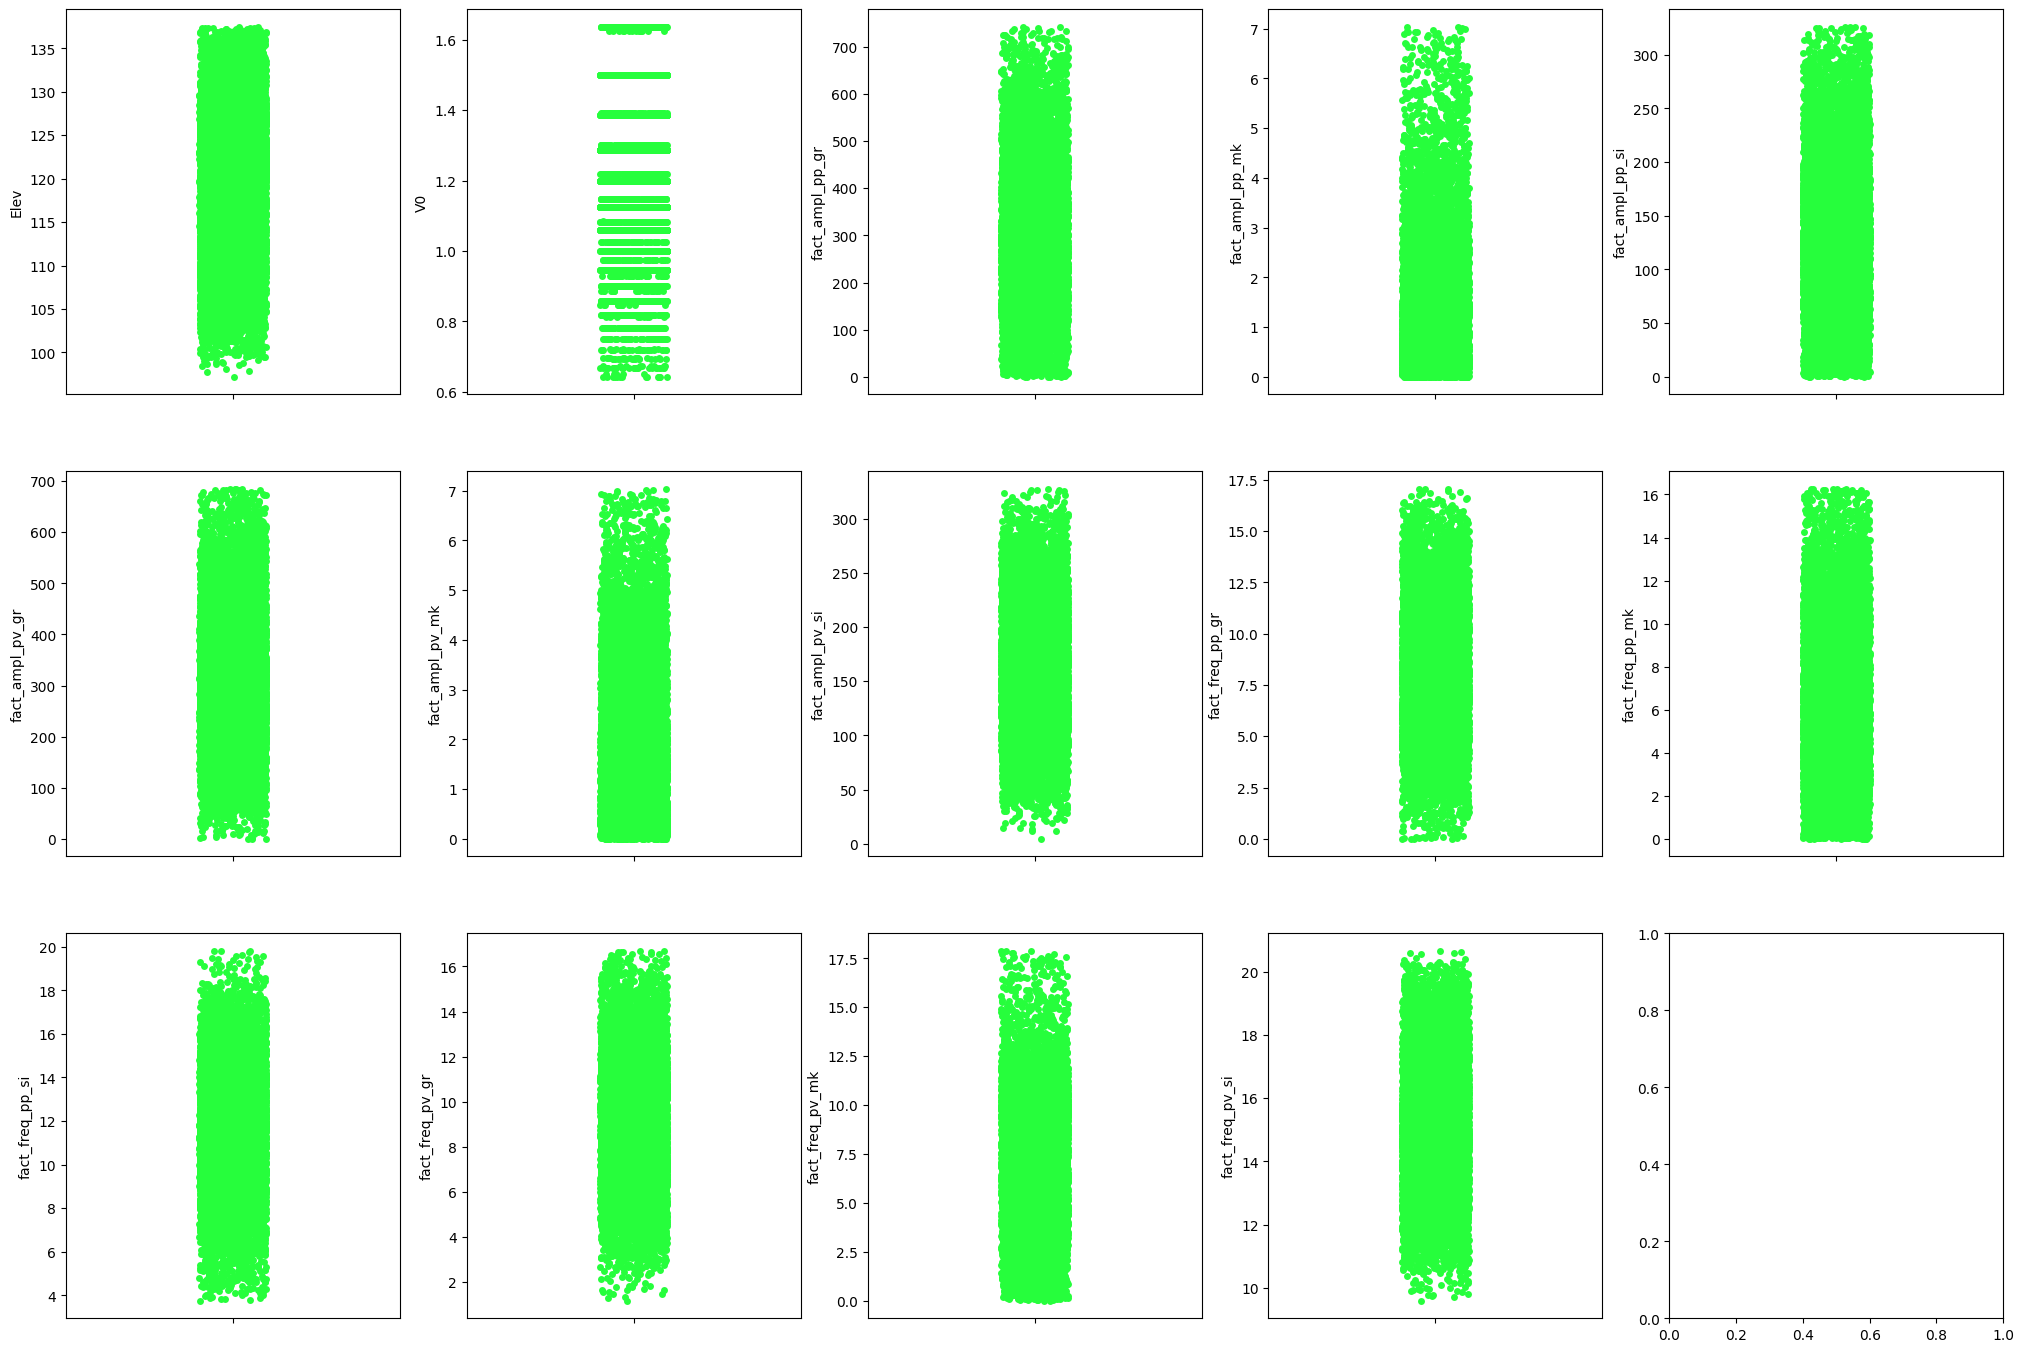

In [11]:
show_all(df_filtered)

# Нормирование

In [12]:
df_normalization =df_filtered.iloc[:, 2:] / df_filtered.iloc[:, 2:].max()
df_normalization=pd.concat((df_filtered[["X", "Y"]],df_normalization),axis=1)
df_normalization

,X,Y,Elev,V0,fact_ampl_pp_gr,fact_ampl_pp_mk,fact_ampl_pp_si,fact_ampl_pv_gr,fact_ampl_pv_mk,fact_ampl_pv_si,fact_freq_pp_gr,fact_freq_pp_mk,fact_freq_pp_si,fact_freq_pv_gr,fact_freq_pv_mk,fact_freq_pv_si
0,16150.04,17986.10,0.874246,0.846154,0.382866,0.179573,0.395322,0.399641,0.118099,0.623877,0.500984,0.403851,0.605431,0.614811,0.365876,0.681109
1,16100.66,17978.20,0.783293,0.846154,0.163152,0.067464,0.018044,0.330183,0.126272,0.662095,0.393834,0.096221,0.781711,0.663982,0.294502,0.708308
2,16051.08,17970.41,0.782211,0.846154,0.173891,0.062503,0.049086,0.366635,0.121747,0.668182,0.409709,0.099441,0.784517,0.746981,0.252366,0.709385
3,16001.70,17962.51,0.781131,0.785714,0.186983,0.055605,0.078746,0.379965,0.107309,0.626129,0.419843,0.101643,0.787118,0.817767,0.253384,0.706720
4,15952.72,17954.81,0.780175,0.785714,0.201171,0.046481,0.101448,0.365641,0.112092,0.622578,0.420323,0.102504,0.790245,0.669546,0.269132,0.694511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17030,17550.08,2116.05,0.938469,0.785714,0.427594,0.021645,0.622071,0.515782,0.440437,0.618719,0.433915,0.515366,0.548032,0.446369,0.544414,0.704980
17033,17500.70,2108.15,0.938137,0.785714,0.432608,0.008089,0.621700,0.727509,0.503610,0.920997,0.400727,0.539425,0.545092,0.580401,0.457165,0.641791
17041,16940.62,5966.41,0.923144,0.425595,0.354757,0.041835,0.027686,0.075306,0.203049,0.335668,0.091774,0.109187,0.457700,0.755535,0.563553,0.730753
17044,18214.91,4953.52,0.919398,0.744792,0.276859,0.006045,0.064350,0.370176,0.038331,0.648408,0.314778,0.132517,0.307251,0.574285,0.494628,0.769435


In [13]:
attribute = df_filtered.drop(["X", "Y"], axis=1)
attribute

,Elev,V0,fact_ampl_pp_gr,fact_ampl_pp_mk,fact_ampl_pp_si,fact_ampl_pv_gr,fact_ampl_pv_mk,fact_ampl_pv_si,fact_freq_pp_gr,fact_freq_pp_mk,fact_freq_pp_si,fact_freq_pv_gr,fact_freq_pv_mk,fact_freq_pv_si
0,120.196317,1.384615,284.222090,1.263407,128.907331,273.690278,0.831353,204.348703,8.548696,6.568408,11.996490,10.265258,6.544156,14.080112
1,107.691602,1.384615,121.116506,0.474654,5.883812,226.122562,0.888885,216.866621,6.720315,1.564980,15.489440,11.086243,5.267542,14.642377
2,107.542895,1.384615,129.088820,0.439749,16.006177,251.086520,0.857030,218.860654,6.991201,1.617356,15.545039,12.472042,4.513891,14.664633
3,107.394356,1.285714,138.807711,0.391217,25.677526,260.215629,0.755396,205.086313,7.164131,1.653167,15.596579,13.653929,4.532095,14.609539
4,107.262991,1.285714,149.339632,0.327025,33.080279,250.405839,0.789063,203.922969,7.172312,1.667173,15.658531,11.179142,4.813766,14.357159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17030,129.026108,1.285714,317.425464,0.152284,202.846024,353.228761,3.100431,202.658948,7.404256,8.382143,10.859132,7.452836,9.737535,14.573579
17033,128.980472,1.285714,321.147816,0.056914,202.725123,498.227756,3.545130,301.669270,6.837927,8.773449,10.800875,9.690722,8.176975,13.267308
17041,126.919114,0.696429,263.354696,0.294337,9.028008,51.572902,1.429354,109.946778,1.566024,1.775867,9.069239,12.614860,10.079869,15.106354
17044,126.404079,1.218750,205.526961,0.042533,20.983285,253.511410,0.269825,212.383686,5.371321,2.155317,6.088115,9.588601,8.847043,15.906009


In [14]:
df_normalization = pd.DataFrame(StandardScaler().fit_transform(attribute), columns = attribute.columns)
df_normalization

,Elev,V0,fact_ampl_pp_gr,fact_ampl_pp_mk,fact_ampl_pp_si,fact_ampl_pv_gr,fact_ampl_pv_mk,fact_ampl_pv_si,fact_freq_pp_gr,fact_freq_pp_mk,fact_freq_pp_si,fact_freq_pv_gr,fact_freq_pv_mk,fact_freq_pv_si
0,0.202570,1.101212,0.001355,0.028823,0.012318,-0.196837,-0.657137,0.758946,0.131842,0.107547,0.090369,0.524956,-0.533079,-0.576164
1,-1.382969,1.101212,-1.239673,-0.630084,-2.028505,-0.593435,-0.616849,0.995242,-0.497598,-1.535877,1.417192,0.846605,-0.948977,-0.271997
2,-1.401825,1.101212,-1.179014,-0.659242,-1.860587,-0.385297,-0.639157,1.032882,-0.404343,-1.518674,1.438311,1.389538,-1.194503,-0.259957
3,-1.420659,0.526681,-1.105065,-0.699785,-1.700150,-0.309183,-0.710328,0.772870,-0.344810,-1.506911,1.457890,1.852583,-1.188573,-0.289761
4,-1.437315,0.526681,-1.024930,-0.753409,-1.577346,-0.390972,-0.686752,0.750910,-0.341993,-1.502311,1.481422,0.883001,-1.096809,-0.426290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15196,1.322146,0.526681,0.253991,-0.899384,1.238879,0.466318,0.931838,0.727050,-0.262144,0.703285,-0.341665,-0.576906,0.507267,-0.309215
15197,1.316359,0.526681,0.282314,-0.979054,1.236874,1.675254,1.243249,2.596027,-0.457109,0.831814,-0.363794,0.299862,-0.001135,-1.015865
15198,1.054989,-2.896564,-0.157419,-0.780716,-1.976347,-2.048751,-0.238373,-1.023040,-2.272021,-1.466609,-1.021569,1.445492,0.618794,-0.021001
15199,0.989685,0.137676,-0.597416,-0.991068,-1.778022,-0.365079,-1.050361,0.910619,-0.962005,-1.341975,-2.153971,0.259853,0.217161,0.411587


In [15]:
df_normalization.describe()

,Elev,V0,fact_ampl_pp_gr,fact_ampl_pp_mk,fact_ampl_pp_si,fact_ampl_pv_gr,fact_ampl_pv_mk,fact_ampl_pv_si,fact_freq_pp_gr,fact_freq_pp_mk,fact_freq_pp_si,fact_freq_pv_gr,fact_freq_pv_mk,fact_freq_pv_si
count,1.520100e+04,1.520100e+04,1.520100e+04,1.520100e+04,1.520100e+04,1.520100e+04,1.520100e+04,1.520100e+04,1.520100e+04,1.520100e+04,1.520100e+04,1.520100e+04,1.520100e+04,1.520100e+04
mean,5.983124e-17,1.869726e-17,-2.019304e-16,6.731015e-17,1.738845e-16,-5.235234e-17,3.739453e-17,-3.963820e-16,2.393250e-16,1.196625e-16,-3.963820e-16,7.179749e-16,6.731015e-17,-4.337765e-16
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.712626e+00,-3.207768e+00,-2.160003e+00,-1.026490e+00,-2.126068e+00,-2.473062e+00,-1.239171e+00,-3.011130e+00,-2.810023e+00,-2.049763e+00,-3.042282e+00,-3.035145e+00,-2.664213e+00,-3.008473e+00
25%,-8.452857e-01,-7.913597e-01,-6.867587e-01,-7.074560e-01,-6.910057e-01,-7.108198e-01,-8.030208e-01,-6.924828e-01,-7.054627e-01,-6.840985e-01,-7.044997e-01,-6.997946e-01,-6.670705e-01,-6.923787e-01
50%,1.110086e-01,2.875461e-02,-1.079282e-01,-3.123525e-01,-6.498296e-02,-9.608698e-02,-2.435011e-01,-5.059115e-02,-1.086222e-03,-1.132137e-01,3.954780e-02,-4.103023e-02,2.453349e-01,-3.913356e-03
75%,7.448830e-01,5.266811e-01,5.676853e-01,3.667276e-01,5.830599e-01,6.025124e-01,5.843254e-01,6.968715e-01,6.905552e-01,5.723492e-01,7.156283e-01,6.801970e-01,6.996298e-01,6.518611e-01
max,2.394787e+00,2.563653e+00,3.487157e+00,4.850812e+00,3.283223e+00,3.231149e+00,3.690220e+00,3.084496e+00,3.063271e+00,3.292301e+00,3.060209e+00,3.044651e+00,3.161981e+00,2.990007e+00


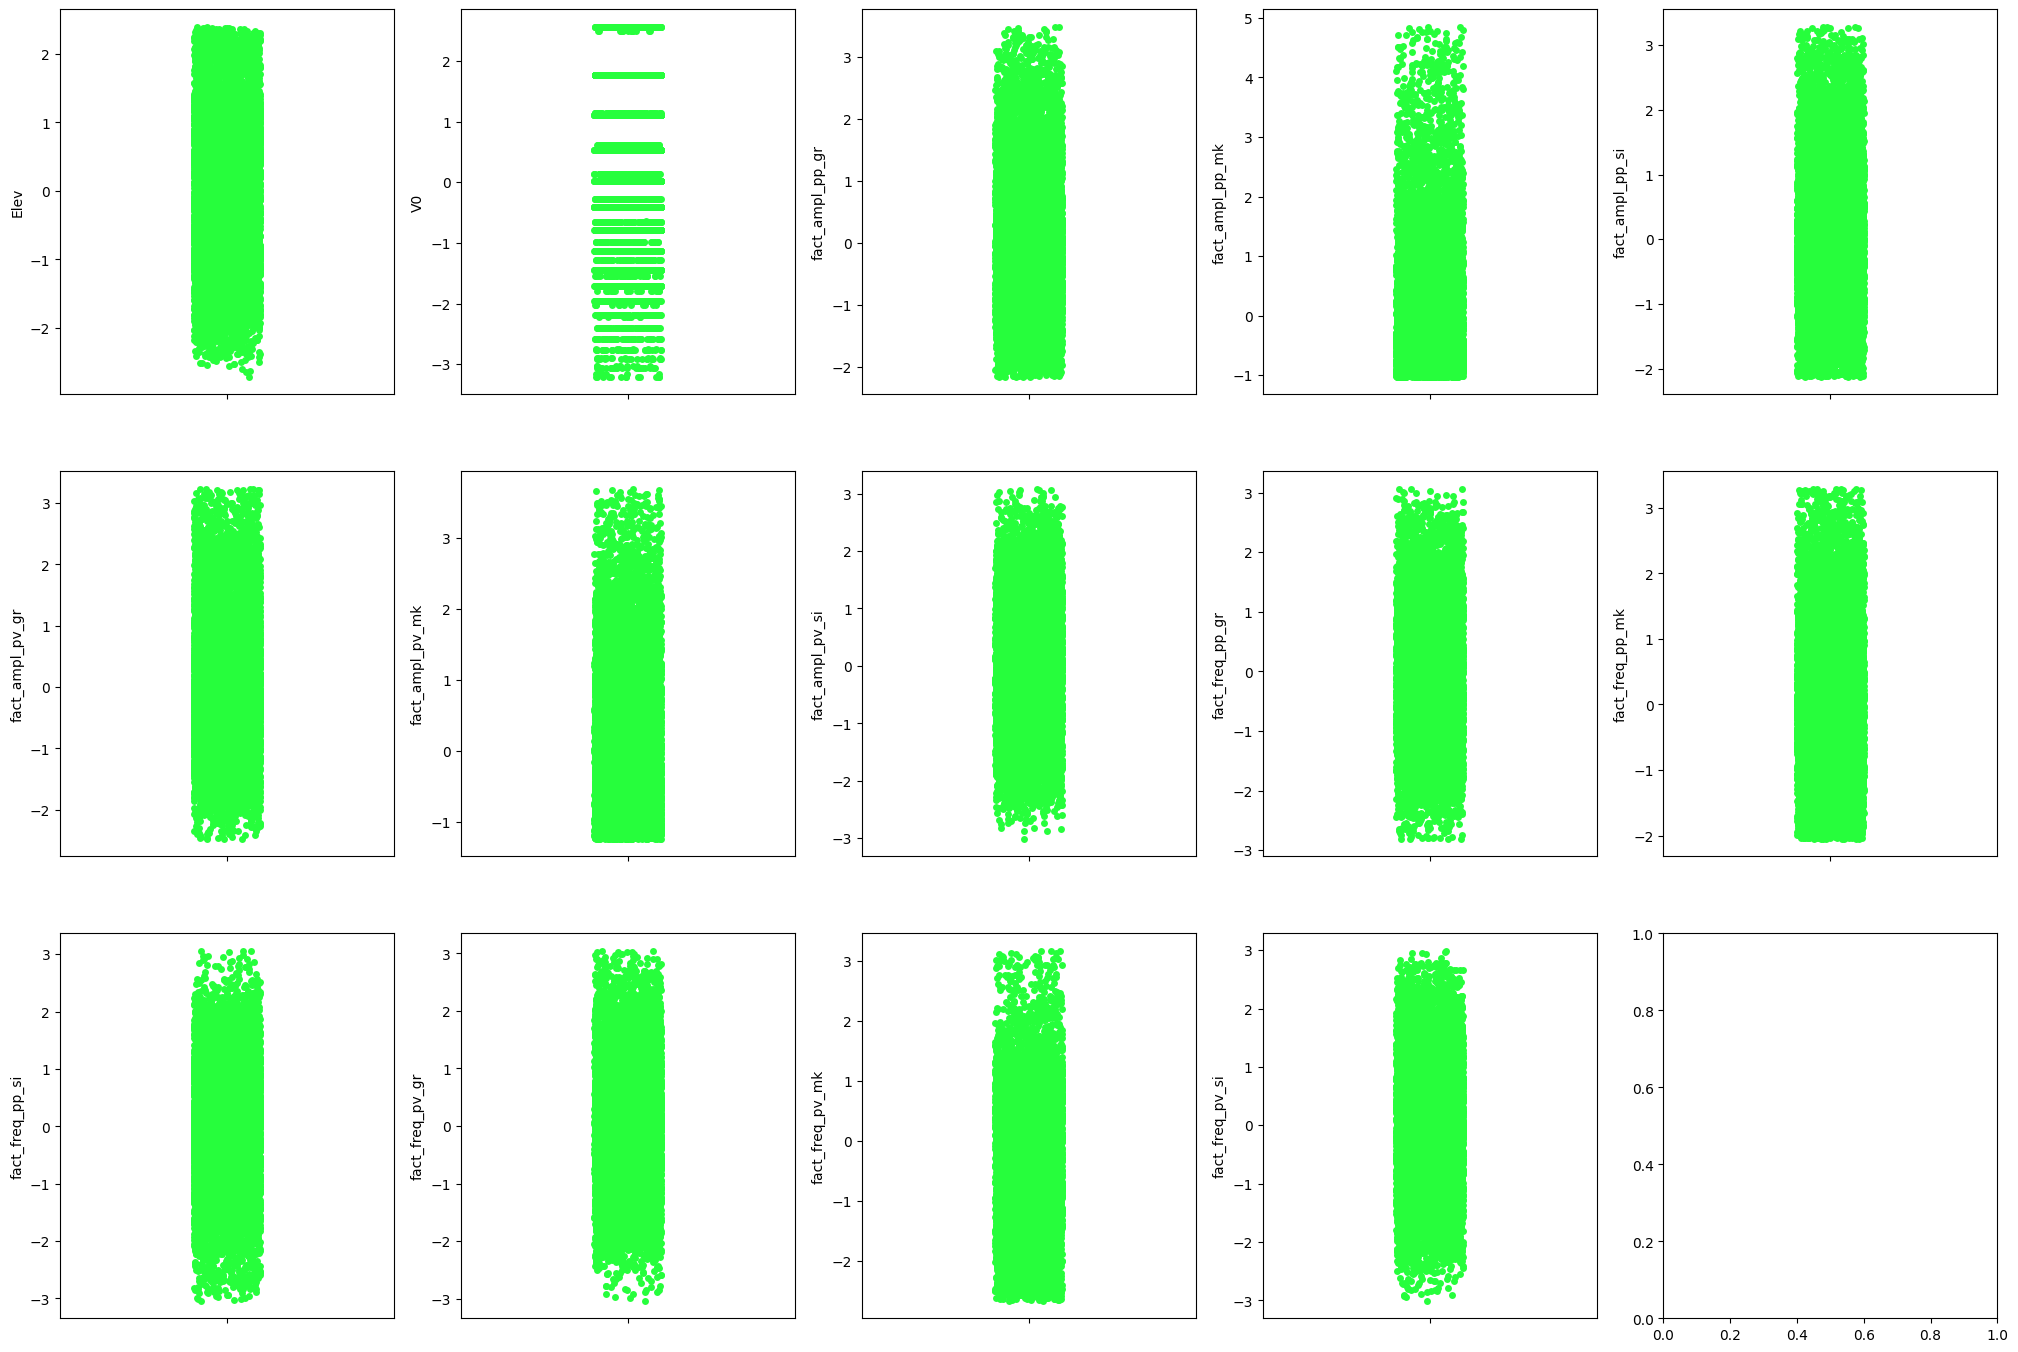

In [16]:
show_all(df_normalization)

# Матрица корреляции

<Axes: >

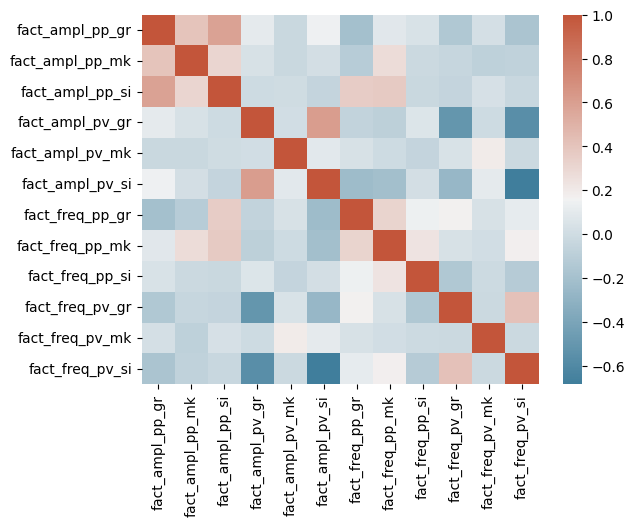

In [17]:
corr_matrix = df_normalization.corr().abs()
sns.heatmap(df_normalization.iloc[:,2:].corr(), cmap = sns.diverging_palette(230, 20, as_cmap=True))

In [18]:
mask = corr_matrix.abs() > 0.5
np.fill_diagonal(mask.values, False)
mask = mask.any()
X = df_normalization.loc[:, ~mask].values
Y = df_normalization.loc[:, mask].values
print(X.shape)
# print(y.shape)

(15201, 8)


# Архитектура

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [20]:
class CustDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()
        X_sample = self.X[index]
        y_sample = self.y[index]
        sample = {'X': torch.from_numpy(X_sample.astype(np.float32)),
                  'y': torch.from_numpy(y_sample.astype(np.float32))}

        return sample

In [21]:
data = CustDataset(X, Y)

row = df_normalization.shape[0]
indexes = np.arange(row)

train_data, _, indices_train, indices_test = train_test_split(data, indexes, test_size=0.1, random_state = 100)
train_data, val_data = train_test_split(train_data, test_size=0.02, random_state = 100)

In [37]:
batch_size = 20
train_loader = DataLoader(train_data, batch_size=batch_size)
val_loader = DataLoader(val_data, batch_size=batch_size)

In [40]:
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(in_features=8, out_features=100),
            nn.ReLU(),
            nn.Linear(in_features=100, out_features=50),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features=50, out_features=6))

    def forward(self, input):
        return self.model(input)

In [41]:
learning_rate = 0.01
num_epochs = 60

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FCNN()
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.L1Loss()

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.3)

hist_train = np.zeros(num_epochs)
hist_val = np.zeros(num_epochs)

In [42]:
for epoch in range(num_epochs):
    train_loss = 0.0
    model.train()
    for data in train_loader:
        x_batch, y_batch = data["X"].to(device), data["y"].to(device)
        optimizer.zero_grad()
        pred = model(x_batch)
        loss = criterion(pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    valid_loss = 0.0
    model.eval()

    for data in val_loader:
        x_batch, y_batch = data["X"].to(device), data["y"].to(device)
        pred = model(x_batch)
        loss = criterion(pred, y_batch)
        valid_loss = loss.item() * val_loader.batch_size


    print(f'Epoch {epoch+1} \t Training Loss: {(train_loss / len(train_loader)):.5f}\
                            \t Validation Loss: {(valid_loss / len(val_loader)):.5f}')

    hist_train[epoch] = train_loss/ len(train_loader)
    hist_val[epoch] = valid_loss / len(val_loader)
    scheduler.step()

    if hist_val[epoch] < hist_val[epoch - 1]:
        torch.save(model.state_dict(), "best_model.pth")

Epoch 1 	 Training Loss: 0.78578                            	 Validation Loss: 1.01347
Epoch 2 	 Training Loss: 0.75767                            	 Validation Loss: 0.96263
Epoch 3 	 Training Loss: 0.74387                            	 Validation Loss: 0.94081
Epoch 4 	 Training Loss: 0.73483                            	 Validation Loss: 0.92913
Epoch 5 	 Training Loss: 0.73054                            	 Validation Loss: 0.92398
Epoch 6 	 Training Loss: 0.72765                            	 Validation Loss: 0.92107
Epoch 7 	 Training Loss: 0.72441                            	 Validation Loss: 0.91726
Epoch 8 	 Training Loss: 0.72237                            	 Validation Loss: 0.91207
Epoch 9 	 Training Loss: 0.72067                            	 Validation Loss: 0.91145
Epoch 10 	 Training Loss: 0.72123                            	 Validation Loss: 0.91164
Epoch 11 	 Training Loss: 0.71805                            	 Validation Loss: 0.91070
Epoch 12 	 Training Loss: 0.71875        

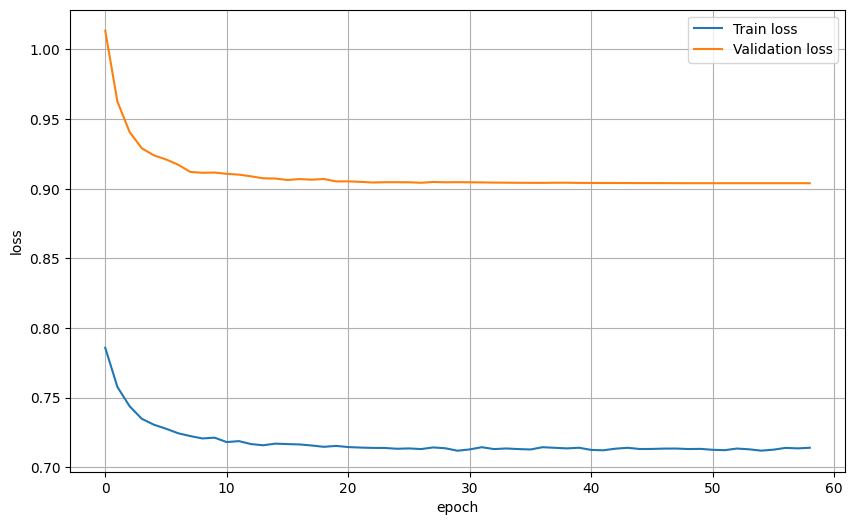

In [43]:
fig = plt.figure(figsize=(10, 6))

plt.plot(hist_train[:epoch], label="Train loss")
plt.plot(hist_val[:epoch], label="Validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()

In [44]:
model.eval()
model.load_state_dict(torch.load("best_model.pth"))
result = model(torch.from_numpy(X[indices_test].astype(np.float32))).detach().numpy()

std = attribute.std(axis=0)
mean = attribute.mean(axis=0)

std_target = std[mask]
mean_target = mean[mask]

In [45]:
prediction = np.zeros_like(result)
real = np.zeros_like(result)
for i in range(len(std_target)-1):
    prediction[:, i] = result[:, i] * std_target[i] + mean_target[i]
    real[:, i] = Y[indices_test][:,i] * std_target[i] + mean_target[i]

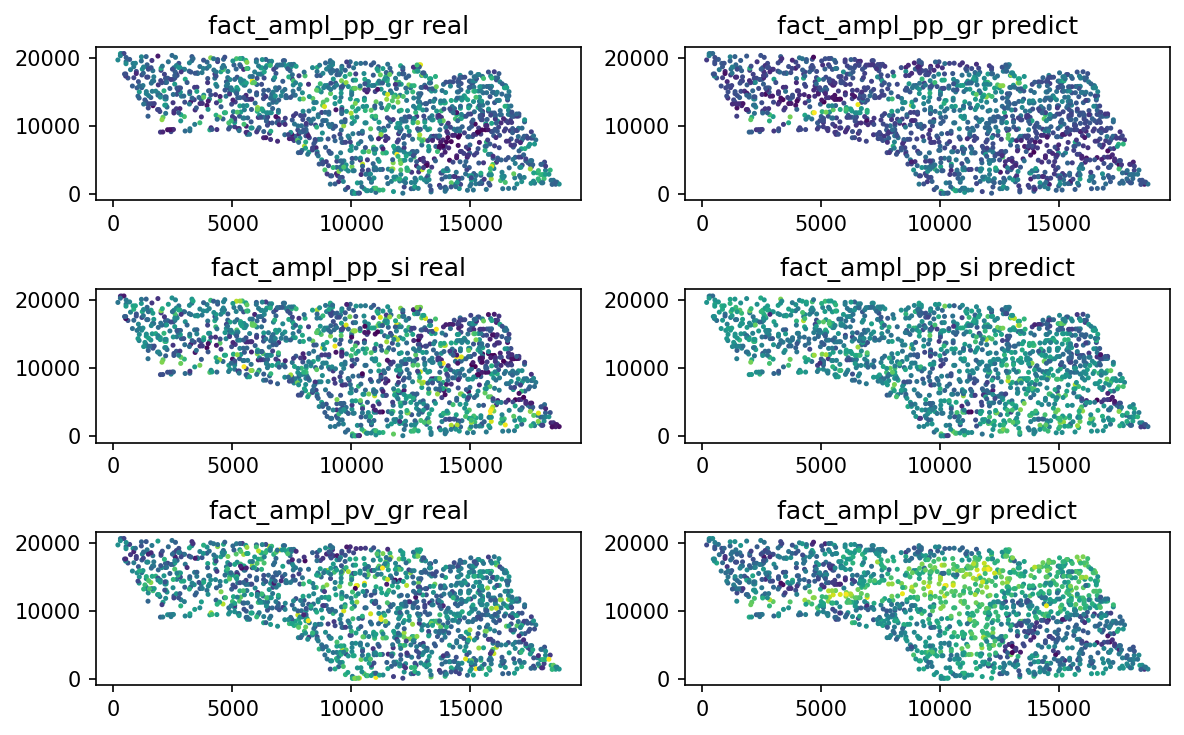

In [48]:
attributes = df_normalization.keys()[mask]
X = df_filtered.X.values
Y = df_filtered.Y.values

fig, ax = plt.subplots(3, 2, figsize=(8, 5), dpi=150)

for i in range(3):
  ax[i, 0].scatter(X[indices_test], Y[indices_test], c=real[:, i], s=2)
  ax[i, 0].set_title(attributes[i] + " real");
  ax[i, 1].scatter(X[indices_test], Y[indices_test], c=prediction[:, i], s=2)
  ax[i, 1].set_title(attributes[i]+ " predict");


fig.tight_layout()

In [49]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [50]:
from torchmetrics.regression import MeanAbsolutePercentageError, MeanAbsoluteError, MeanSquaredError, KLDivergence

mape = torch.zeros(3)
mae = torch.zeros(3)
mse = torch.zeros(3)
kld = torch.zeros(3)

for i in range(3):
    mape[i] = MeanAbsolutePercentageError()(torch.from_numpy(real[:, i]), torch.from_numpy(prediction[:,i]))
    mae[i] = MeanAbsoluteError()(torch.from_numpy(real[:, i]), torch.from_numpy(prediction[:,i]))
    mse[i] = MeanSquaredError()(torch.from_numpy(real[:, i]), torch.from_numpy(prediction[:,i]))
    kld[i] = KLDivergence()(torch.from_numpy(real[:, i]).reshape(1, -1), torch.from_numpy(prediction[:,i]).reshape(1, -1))

print(mape, mae, mse, kld)

tensor([0.3045, 0.3161, 0.3150]) tensor([82.2308, 37.6913, 89.8572]) tensor([11400.8838,  2421.7771, 13105.1582]) tensor([0.0741, 0.0811, 0.0763])
